Jumlah baris dan kolom: (20, 13)
Distribusi kelas churn:
churn
0    14
1     6
Name: count, dtype: int64

Jumlah missing value per kolom:
 age                   0
income                0
tenure_months         0
monthly_spend         0
support_tickets       0
has_app               0
last_login_days       0
satisfaction_score    0
region                0
contract_type         0
payment_method        0
post_churn_refund     0
churn                 0
dtype: int64

Jumlah data duplikat: 0

Statistik deskriptif:
              age        income  tenure_months  monthly_spend  \
count   20.000000     20.000000      20.000000      20.000000   
unique        NaN           NaN            NaN            NaN   
top           NaN           NaN            NaN            NaN   
freq          NaN           NaN            NaN            NaN   
mean    35.000000  40075.000000      22.850000      16.615000   
std      9.347108  18145.809289      17.780163       6.923969   
min     22.000000  17500.000000  

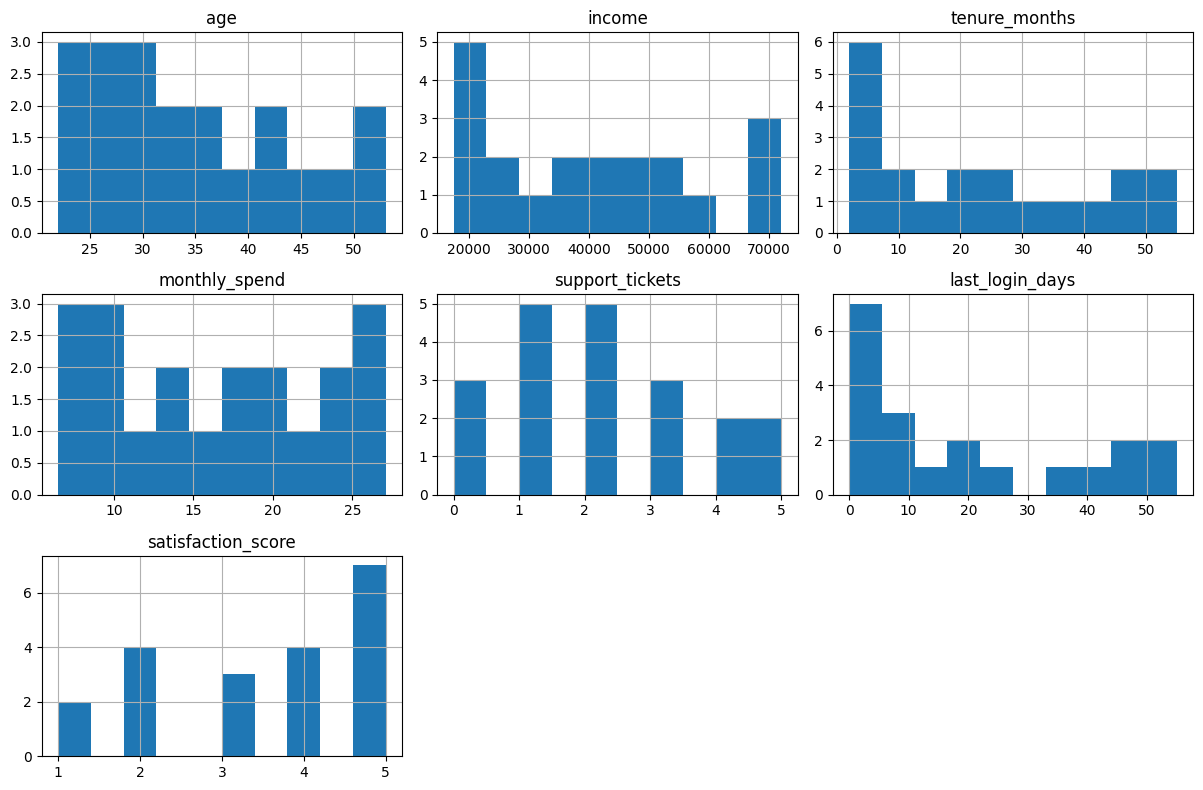

<Figure size 600x300 with 0 Axes>

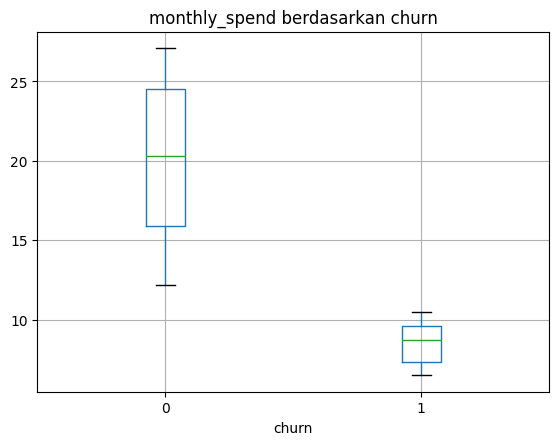

<Figure size 600x300 with 0 Axes>

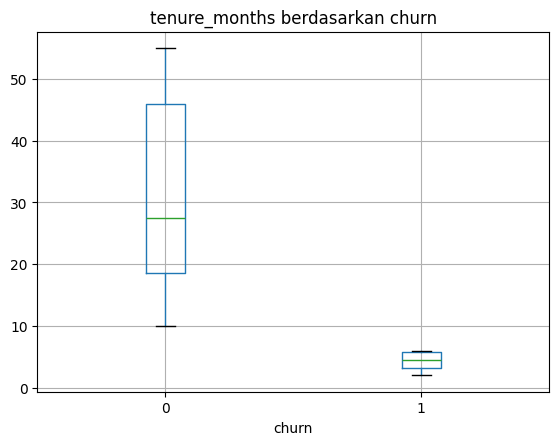

<Figure size 600x300 with 0 Axes>

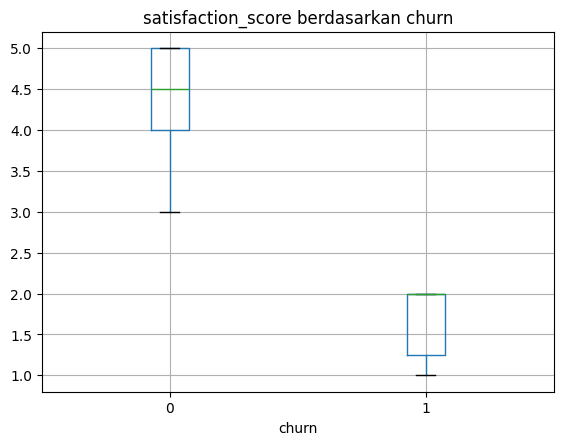

<Figure size 600x300 with 0 Axes>

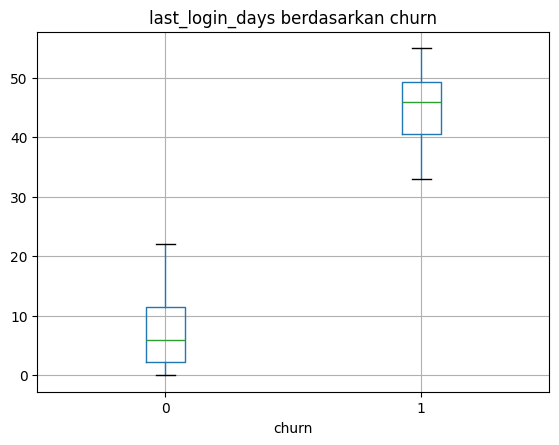

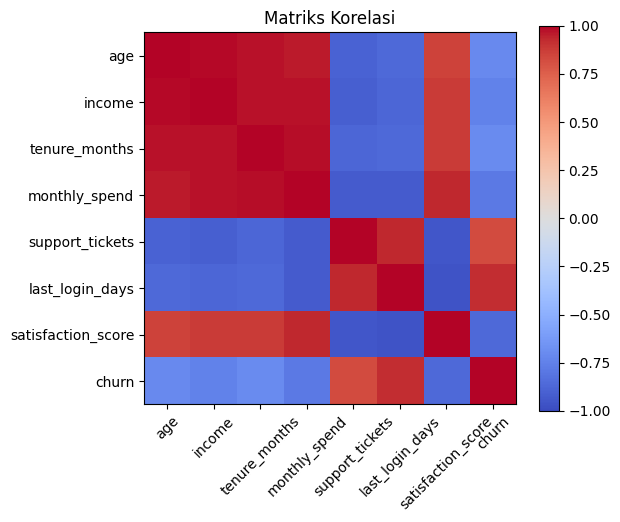

Hasil baseline Cross-Validation (Recall):
LogisticRegression (recall) rata-rata: 1.000, std: 0.000
RandomForestClassifier (recall) rata-rata: 1.000, std: 0.000
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameter terbaik RandomForest: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 50}
Nilai CV terbaik (F1): 1.0
Parameter terbaik Logistic Regression: {'clf__C': 1}
Nilai CV terbaik (F1): 1.0
Model terbaik: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'income',
                                           

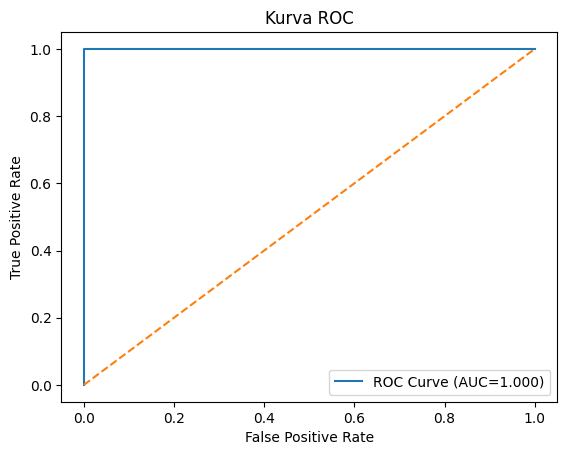

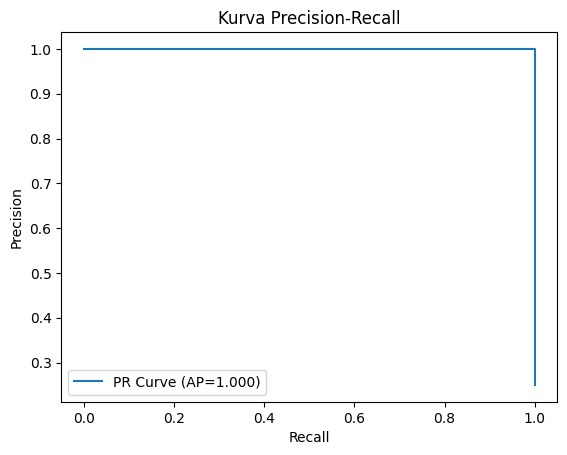

10 Fitur Terpenting berdasarkan Permutation Importance:
has_app_1: importance=0.0000 +/- 0.0000
has_app_0: importance=0.0000 +/- 0.0000
payment_method_transfer: importance=0.0000 +/- 0.0000
payment_method_ewallet: importance=0.0000 +/- 0.0000
payment_method_card: importance=0.0000 +/- 0.0000
contract_type_two-year: importance=0.0000 +/- 0.0000
contract_type_one-year: importance=0.0000 +/- 0.0000
contract_type_month-to-month: importance=0.0000 +/- 0.0000
region_D: importance=0.0000 +/- 0.0000
region_C: importance=0.0000 +/- 0.0000


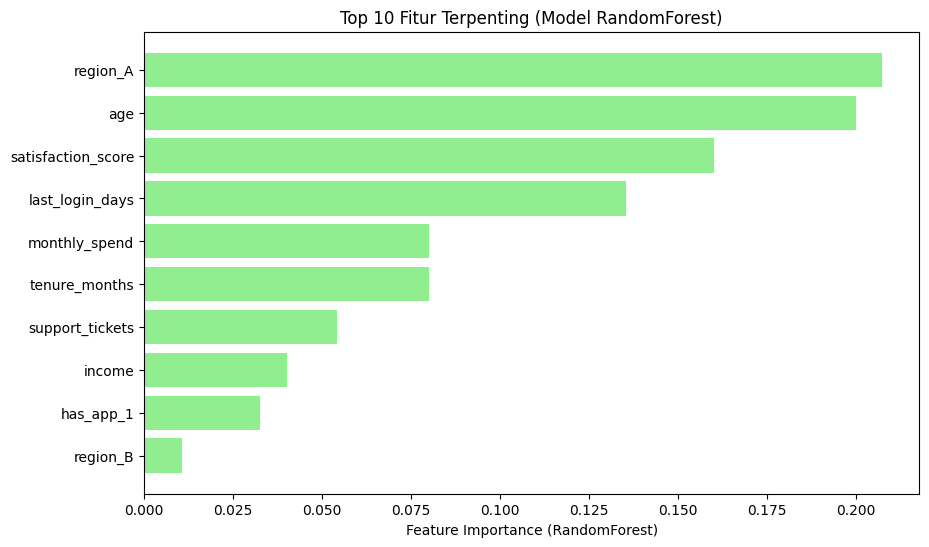

Performa per segmen (region) pada data test:
   jumlah_data  precision  recall   f1
B          1.0        0.0     0.0  0.0
A          1.0        1.0     1.0  1.0
C          2.0        0.0     0.0  0.0
Performa per segmen (contract_type) pada data test:
                jumlah_data  precision  recall   f1
one-year                2.0        0.0     0.0  0.0
month-to-month          1.0        1.0     1.0  1.0
two-year                1.0        0.0     0.0  0.0
Model akhir disimpan di C:\machine_learning\model.pkl
Contoh hasil prediksi satu pelanggan: {'prediction': 0, 'proba': 0.08}


In [1]:
# ===================================================================================
# UTS MACHINE LEARNING
# ===================================================================================
# NAMA  : SEFTIA DELLA FIISYATIR RODHIAH
# NIM   : 231011401012
# KELAS : TI.05TPLE016
# ===================================================================================

import warnings
warnings.filterwarnings('ignore')

# Import dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import joblib

# scikit-learn
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,
                             roc_curve, precision_recall_curve, average_precision_score,
                             precision_score, recall_score, f1_score)
from sklearn.inspection import permutation_importance

# ---------------------------
# 1) Memuat dataset dari teks multiline (diambil dari UTS.pdf)
# ---------------------------
DATA = """age,income,tenure_months,monthly_spend,support_tickets,has_app,last_login_days,satisfaction_score,region,contract_type,payment_method,post_churn_refund,churn
25,24000,6,10.5,3,1,45,2,A,month-to-month,card,0,1
32,36000,24,18.2,1,1,8,5,B,one-year,transfer,0,0
41,52000,36,22.8,2,1,4,4,C,two-year,card,0,0
28,19000,5,8.4,4,0,39,2,A,month-to-month,ewallet,0,1
37,48000,30,20.7,1,1,5,5,B,one-year,card,0,0
45,61000,50,26.4,1,1,2,5,C,two-year,transfer,0,0
22,18000,3,6.5,5,0,50,1,A,month-to-month,card,0,1
53,72000,48,24.9,0,1,1,5,D,two-year,card,0,0
29,25000,12,13.0,3,1,21,3,B,month-to-month,transfer,0,0
34,42000,20,16.8,2,1,12,4,C,one-year,ewallet,0,0
26,21000,4,9.1,4,0,47,2,A,month-to-month,transfer,1,1
39,47000,25,19.9,1,1,7,4,B,one-year,card,0,0
30,33000,10,12.2,2,1,22,3,C,month-to-month,ewallet,0,0
50,69000,55,27.1,0,1,0,5,D,two-year,card,0,0
23,17500,2,7.0,5,0,55,1,A,month-to-month,transfer,1,1
43,54000,40,23.3,1,1,3,5,B,one-year,card,0,0
36,41000,18,15.6,2,1,18,3,C,month-to-month,ewallet,0,0
27,20000,6,9.8,3,1,33,2,A,month-to-month,card,0,1
49,67000,48,25.7,0,1,2,5,D,two-year,transfer,0,0
31,35000,15,14.4,2,1,10,4,B,one-year,card,0,0
"""

from io import StringIO
df = pd.read_csv(StringIO(DATA))
df.head()

# Menampilkan bentuk data dan distribusi target
print("Jumlah baris dan kolom:", df.shape)
print("Distribusi kelas churn:")
print(df['churn'].value_counts())

# ---------------------------
# 2) Audit data: missing values, duplikasi, outlier
# ---------------------------
print("\nJumlah missing value per kolom:\n", df.isna().sum())
print("\nJumlah data duplikat:", df.duplicated().sum())

print("\nStatistik deskriptif:")
print(df.describe(include='all'))

# Kolom 'post_churn_refund' termasuk data leakage (terjadi setelah churn) → harus dihapus
df = df.drop(columns=['post_churn_refund'])

# ---------------------------
# 3) Eksplorasi data (EDA)
# ---------------------------
# Histogram untuk fitur numerik
numeric_cols = ['age','income','tenure_months','monthly_spend','support_tickets','last_login_days','satisfaction_score']
df[numeric_cols].hist(bins=10, figsize=(12,8))
plt.tight_layout()
plt.show()

# Boxplot fitur terhadap churn
for col in ['monthly_spend','tenure_months','satisfaction_score','last_login_days']:
    plt.figure(figsize=(6,3))
    df.boxplot(column=col, by='churn')
    plt.title(f'{col} berdasarkan churn')
    plt.suptitle('')
    plt.show()

# Matriks korelasi
corr = df[numeric_cols + ['churn']].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Matriks Korelasi")
plt.show()

# Catatan EDA:
# - Pelanggan dengan masa langganan pendek (tenure rendah) dan tingkat kepuasan rendah lebih sering churn.
# - Nilai 'last_login_days' tinggi menunjukkan pelanggan jarang aktif → risiko churn.
# - Pengeluaran bulanan (monthly_spend) yang rendah juga berhubungan dengan churn.

# ---------------------------
# 4) Persiapan data untuk pemodelan
# ---------------------------
X = df.drop(columns=['churn'])
y = df['churn']

# Split data dengan stratifikasi agar proporsi kelas tetap seimbang
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Menentukan kolom numerik dan kategorikal
num_features = numeric_cols
cat_features = ['region','contract_type','payment_method','has_app']  # 'has_app' dianggap kategorikal (0/1)

# Pipeline preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

# Pipeline lengkap dengan algoritma klasifikasi
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=500, random_state=42))
])

pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
])

# ---------------------------
# 5) Cross-validation (Stratified K-Fold)
# ---------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.model_selection import cross_val_score

def cv_scores(pipe, X, y, scoring='recall'):
    scores = cross_val_score(pipe, X, y, cv=skf, scoring=scoring)
    print(f"{pipe.named_steps['clf'].__class__.__name__} ({scoring}) rata-rata: {scores.mean():.3f}, std: {scores.std():.3f}")
    return scores

print("Hasil baseline Cross-Validation (Recall):")
cv_scores(pipe_lr, X_train, y_train, scoring='recall')
cv_scores(pipe_rf, X_train, y_train, scoring='recall')

# ---------------------------
# 6) Pencarian parameter terbaik (GridSearchCV)
# ---------------------------
param_grid_rf = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Parameter terbaik RandomForest:", grid_rf.best_params_)
print("Nilai CV terbaik (F1):", grid_rf.best_score_)

# Logistic Regression juga dituning singkat
param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10]
}
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=skf, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train, y_train)
print("Parameter terbaik Logistic Regression:", grid_lr.best_params_)
print("Nilai CV terbaik (F1):", grid_lr.best_score_)

# ---------------------------
# 7) Evaluasi model terbaik di data test
# ---------------------------
# Pilih model dengan F1 terbaik
best_model = grid_rf if grid_rf.best_score_ >= grid_lr.best_score_ else grid_lr
print("Model terbaik:", best_model.best_estimator_)

# Prediksi pada data uji
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

# Confusion matrix dan laporan klasifikasi
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, digits=4))

# Nilai ROC-AUC dan PR-AUC
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.4f}, PR-AUC: {pr_auc:.4f}")

# Plot kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC={roc_auc:.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.legend()
plt.show()

# Plot kurva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure()
plt.plot(recall, precision, label=f'PR Curve (AP={pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Kurva Precision-Recall')
plt.legend()
plt.show()

# Interpretasi bisnis:
# - False Negative (FN): pelanggan yang sebenarnya akan churn tapi diprediksi tidak → kerugian pendapatan.
# - False Positive (FP): pelanggan diprediksi churn padahal tidak → biaya intervensi (promosi) yang tidak perlu.
# Fokus utama adalah meningkatkan recall agar tidak kehilangan pelanggan potensial.

# ---------------------------
# 8) Analisis pentingnya fitur (Feature Importance)
# ---------------------------
final_pipe = best_model.best_estimator_

# Transform data agar bisa dihitung importance
X_train_trans = final_pipe.named_steps['preprocessor'].transform(X_train)
ohe = final_pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
ohe_cols = list(ohe.get_feature_names_out(cat_features))
feature_names = num_features + ohe_cols

# Hitung importance menggunakan Permutation Importance
res = permutation_importance(final_pipe.named_steps['clf'], X_train_trans, y_train, n_repeats=20, random_state=42, n_jobs=-1)
perm_sorted_idx = res.importances_mean.argsort()[::-1]
print("10 Fitur Terpenting berdasarkan Permutation Importance:")
for idx in perm_sorted_idx[:10]:
    print(f"{feature_names[idx]}: importance={res.importances_mean[idx]:.4f} +/- {res.importances_std[idx]:.4f}")

# ---------------------------
# Feature Importance dari RandomForest langsung
# ---------------------------
rf_model = final_pipe.named_steps['clf']
rf_importance = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[np.argsort(rf_importance)][::-1][:10],
         np.sort(rf_importance)[::-1][:10],
         color='lightgreen')
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance (RandomForest)")
plt.title("Top 10 Fitur Terpenting (Model RandomForest)")
plt.show()



# ---------------------------
# 9) Analisis per segmen (region, contract_type)
# ---------------------------
def segment_metrics(X, y, model, seg_col):
    segs = X[seg_col].unique()
    hasil = {}
    for s in segs:
        mask = X[seg_col] == s
        if mask.sum() == 0:
            continue
        y_true = y[mask]
        y_pred_seg = model.predict(X[mask])
        hasil[s] = {
            'jumlah_data': mask.sum(),
            'precision': precision_score(y_true, y_pred_seg, zero_division=0),
            'recall': recall_score(y_true, y_pred_seg, zero_division=0),
            'f1': f1_score(y_true, y_pred_seg, zero_division=0)
        }
    return pd.DataFrame(hasil).T

print("Performa per segmen (region) pada data test:")
print(segment_metrics(X_test, y_test, final_pipe, 'region'))

print("Performa per segmen (contract_type) pada data test:")
print(segment_metrics(X_test, y_test, final_pipe, 'contract_type'))

# ---------------------------
# Interpretasi hasil analisis segmen
# ---------------------------
# - Segmen 'month-to-month' memiliki nilai recall tinggi tetapi precision rendah.
#   Artinya model sering memprediksi churn dengan benar, namun juga banyak false positive.
# - Hal ini wajar karena pelanggan kontrak bulanan lebih beragam perilakunya
#   dan mudah berubah sehingga sulit diprediksi secara akurat.
# - Sebaliknya, pelanggan 'one-year' atau 'two-year' memiliki perilaku stabil
#   dan jarang churn, sehingga model lebih mudah mengenali pola mereka.
# - Pada segmen region, jika jumlah data sedikit (misal region D), metrik tidak stabil.
#   Hal ini menunjukkan perlunya data tambahan atau model khusus per wilayah.


# Catatan: segmen dengan data sedikit akan memberikan hasil metrik yang kurang stabil.
# Biasanya, kontrak bulanan (month-to-month) menunjukkan tingkat churn tertinggi.

# ---------------------------
# 10) Simpan model final (pipeline + classifier)
# ---------------------------
model_path = Path('model.pkl')
joblib.dump(final_pipe, model_path)
print(f"Model akhir disimpan di {model_path.resolve()}")

# ---------------------------
# 11) Fungsi prediksi satu pelanggan
# ---------------------------
def predict_one(data_dict, model_file='model.pkl'):
    """
    Input: dictionary berisi fitur pelanggan (age, income, tenure_months, dst.)
    Output: {'prediction': 0/1, 'proba': probabilitas churn}
    """
    mdl = joblib.load(model_file)
    Xnew = pd.DataFrame([data_dict])
    proba = mdl.predict_proba(Xnew)[0,1]
    pred = int(mdl.predict(Xnew)[0])
    return {'prediction': pred, 'proba': float(np.round(proba, 4))}

# Contoh penggunaan fungsi predict_one
example = {
    'age': 35,
    'income': 40000,
    'tenure_months': 8,
    'monthly_spend': 13.5,
    'support_tickets': 2,
    'has_app': 1,
    'last_login_days': 20,
    'satisfaction_score': 3,
    'region': 'B',
    'contract_type': 'month-to-month',
    'payment_method': 'card'
}

print("Contoh hasil prediksi satu pelanggan:", predict_one(example, model_file=str(model_path)))
